## Multiple Linear Regression model

### Bike Sharing Case Study

#### Problem Statement:

Bike sharing Company BoomBikes need to identify the factors/Variables which affects demand of bike sharing count. So that they will be ready with those quantity of bike before hand in order to increase there revenue becuase due to COVID the company is facing losses and we need to help them recover sales post COVID

So Interpretation is important!


##### The Steps we will follow in this excerise are as follows:
1. Reading, Understanding and Visualising the data
2. Preparing the data for modelling ( Train-test split, Rescaling etc)
3. training the model
4. Residual Analysis
5. Prediction and evalution on the test set

### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and Read the Bike Sharing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
bike_sharing_dataset = pd.read_csv("day.csv")
bike_sharing_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of dataframe
bike_sharing_dataset.shape

(730, 16)

### Observation :
- Bike Dataset has 730 rows and 16 column,
- Except one column, all other are either float or integer type.
- One column is date type.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
- We will see whether to convert them to categorical or treat as integer later in the case study

## DATA QUALITY CHECK


### Check for NULL/MISSING values

In [4]:
#Checking of missing values
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation:

- No Missing/ Null values

In [5]:
bike_sharing_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# renaming few columns for better readibility

bike_sharing_dataset.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [7]:
#check the head of the dataset 

bike_sharing_dataset.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe as bike_df, so that the original dataset is preserved for any future analysis/validation

In [8]:
bike_sharing_dataset.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike_df = bike_sharing_dataset[[ 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed','cnt']]

In [10]:
# Encoding/mapping the season column

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [11]:
#Check the head of the dataset

bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Visualising the data

<Axes: xlabel='weekday', ylabel='cnt'>

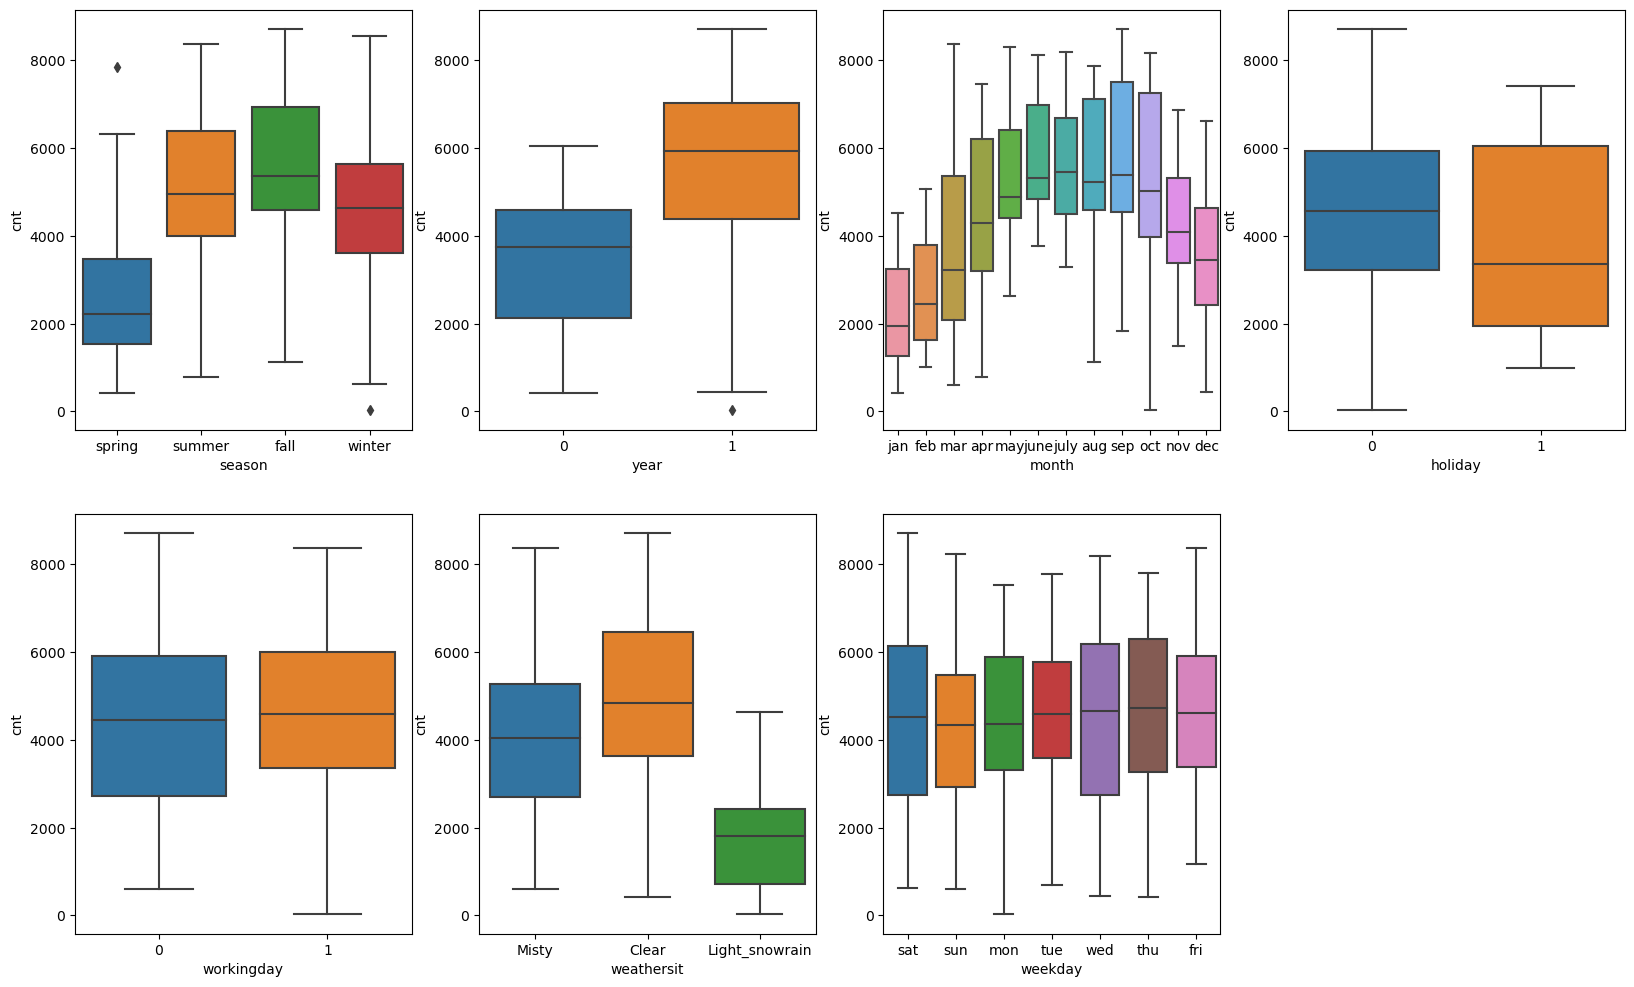

In [12]:
# Visualising the categorical variable. Good way to visualise the categorical variable is using the box plot
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt",data=bike_df)

plt.subplot(2,4,2)
sns.boxplot(x="year",y="cnt",data=bike_df)

plt.subplot(2,4,3)
sns.boxplot(x="month",y="cnt",data=bike_df)

plt.subplot(2,4,4)
sns.boxplot(x="holiday",y="cnt",data=bike_df)

plt.subplot(2,4,5)
sns.boxplot(x="workingday",y="cnt",data=bike_df)

plt.subplot(2,4,6)
sns.boxplot(x="weathersit",y="cnt",data=bike_df)

plt.subplot(2,4,7)
sns.boxplot(x="weekday",y="cnt",data=bike_df)


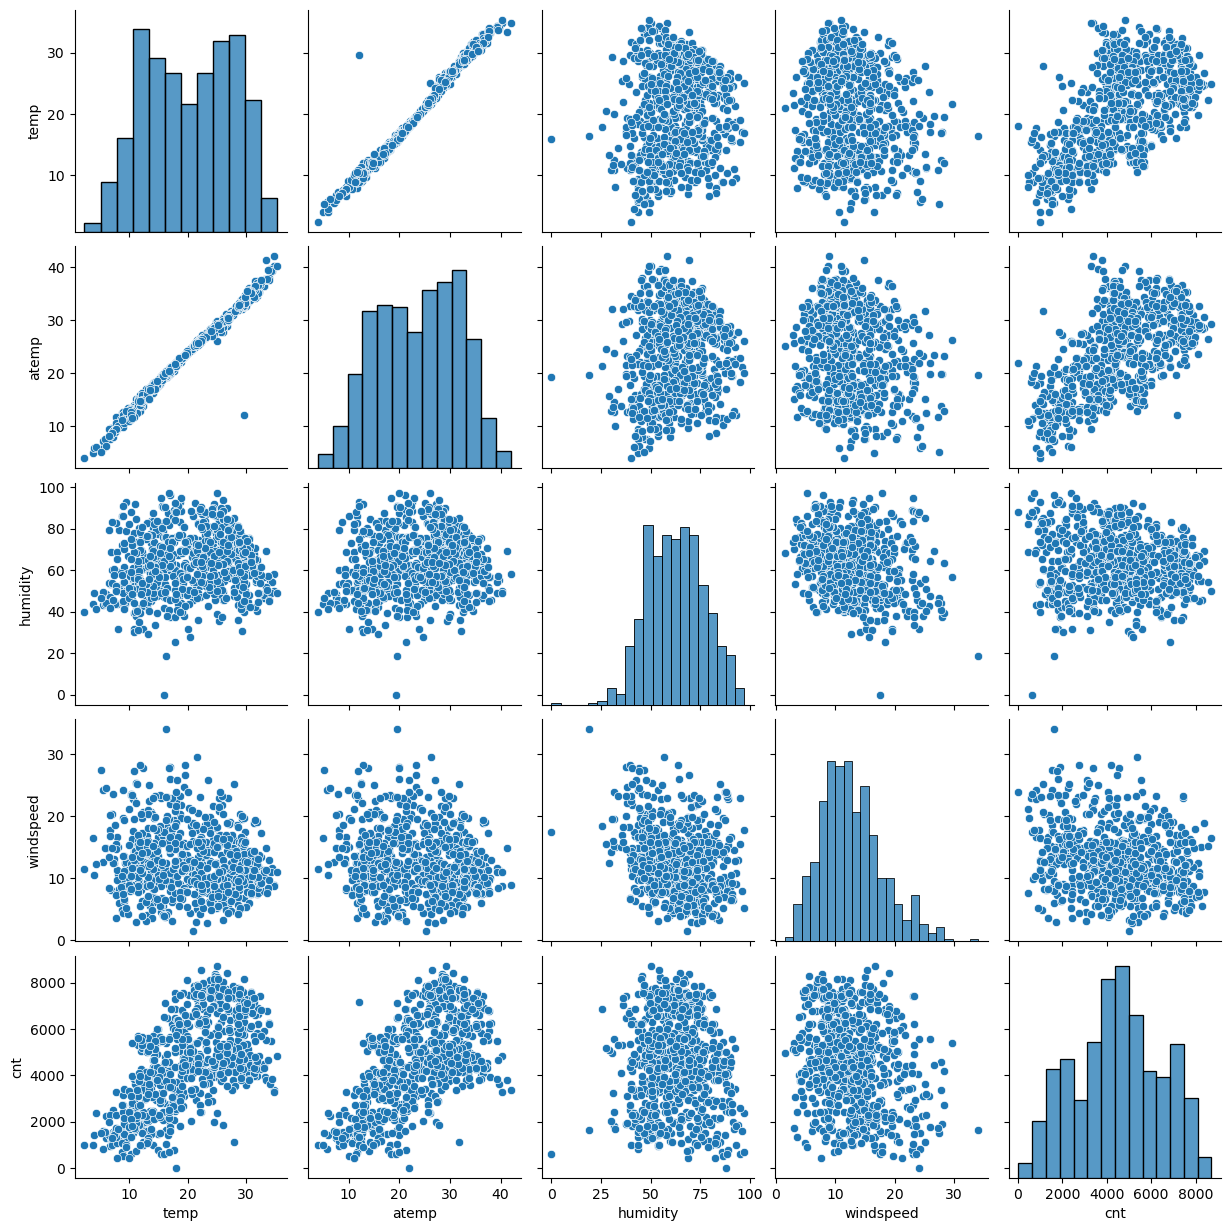

In [13]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

#### Observation:
1. There is some linear correlation with cnt and temp
2. Cnt is more in 2019 as compared to 2018
3. People like to ride bike more in fall season
4. More bike sharing is needed when its not a holiday.
5. On Clear weather more booking are observed

## Step 2 : Preparing the Data for Modelling
- Encoding:
    - Converting binary vars to 1/0 (in our case it already in 1/0 format)
    - Other Categorical vars to dummy vars (in our case 
- Splitting into train and test
- Rescaling of varibales

In [14]:
# Convert to 'category' data type

bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['month']=bike_df['month'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [15]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  month_aug                  730 non-null    uint8  
 12  month_dec                  730 non-null    uint8  
 13  month_feb                  730 non-null    uint8  

#### Splitting into train and test 
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [16]:
df_train, df_test = train_test_split(bike_df,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling of variables
- Min Max scaling
- Standardisation (mean-0, sigma-1)

In [17]:
# 1. Instantiate an Object
scaler = MinMaxScaler()

#create a list of numberic vars
num_vars = ["temp","atemp","humidity","windspeed","cnt"]

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


## Step 3 - Training the Model


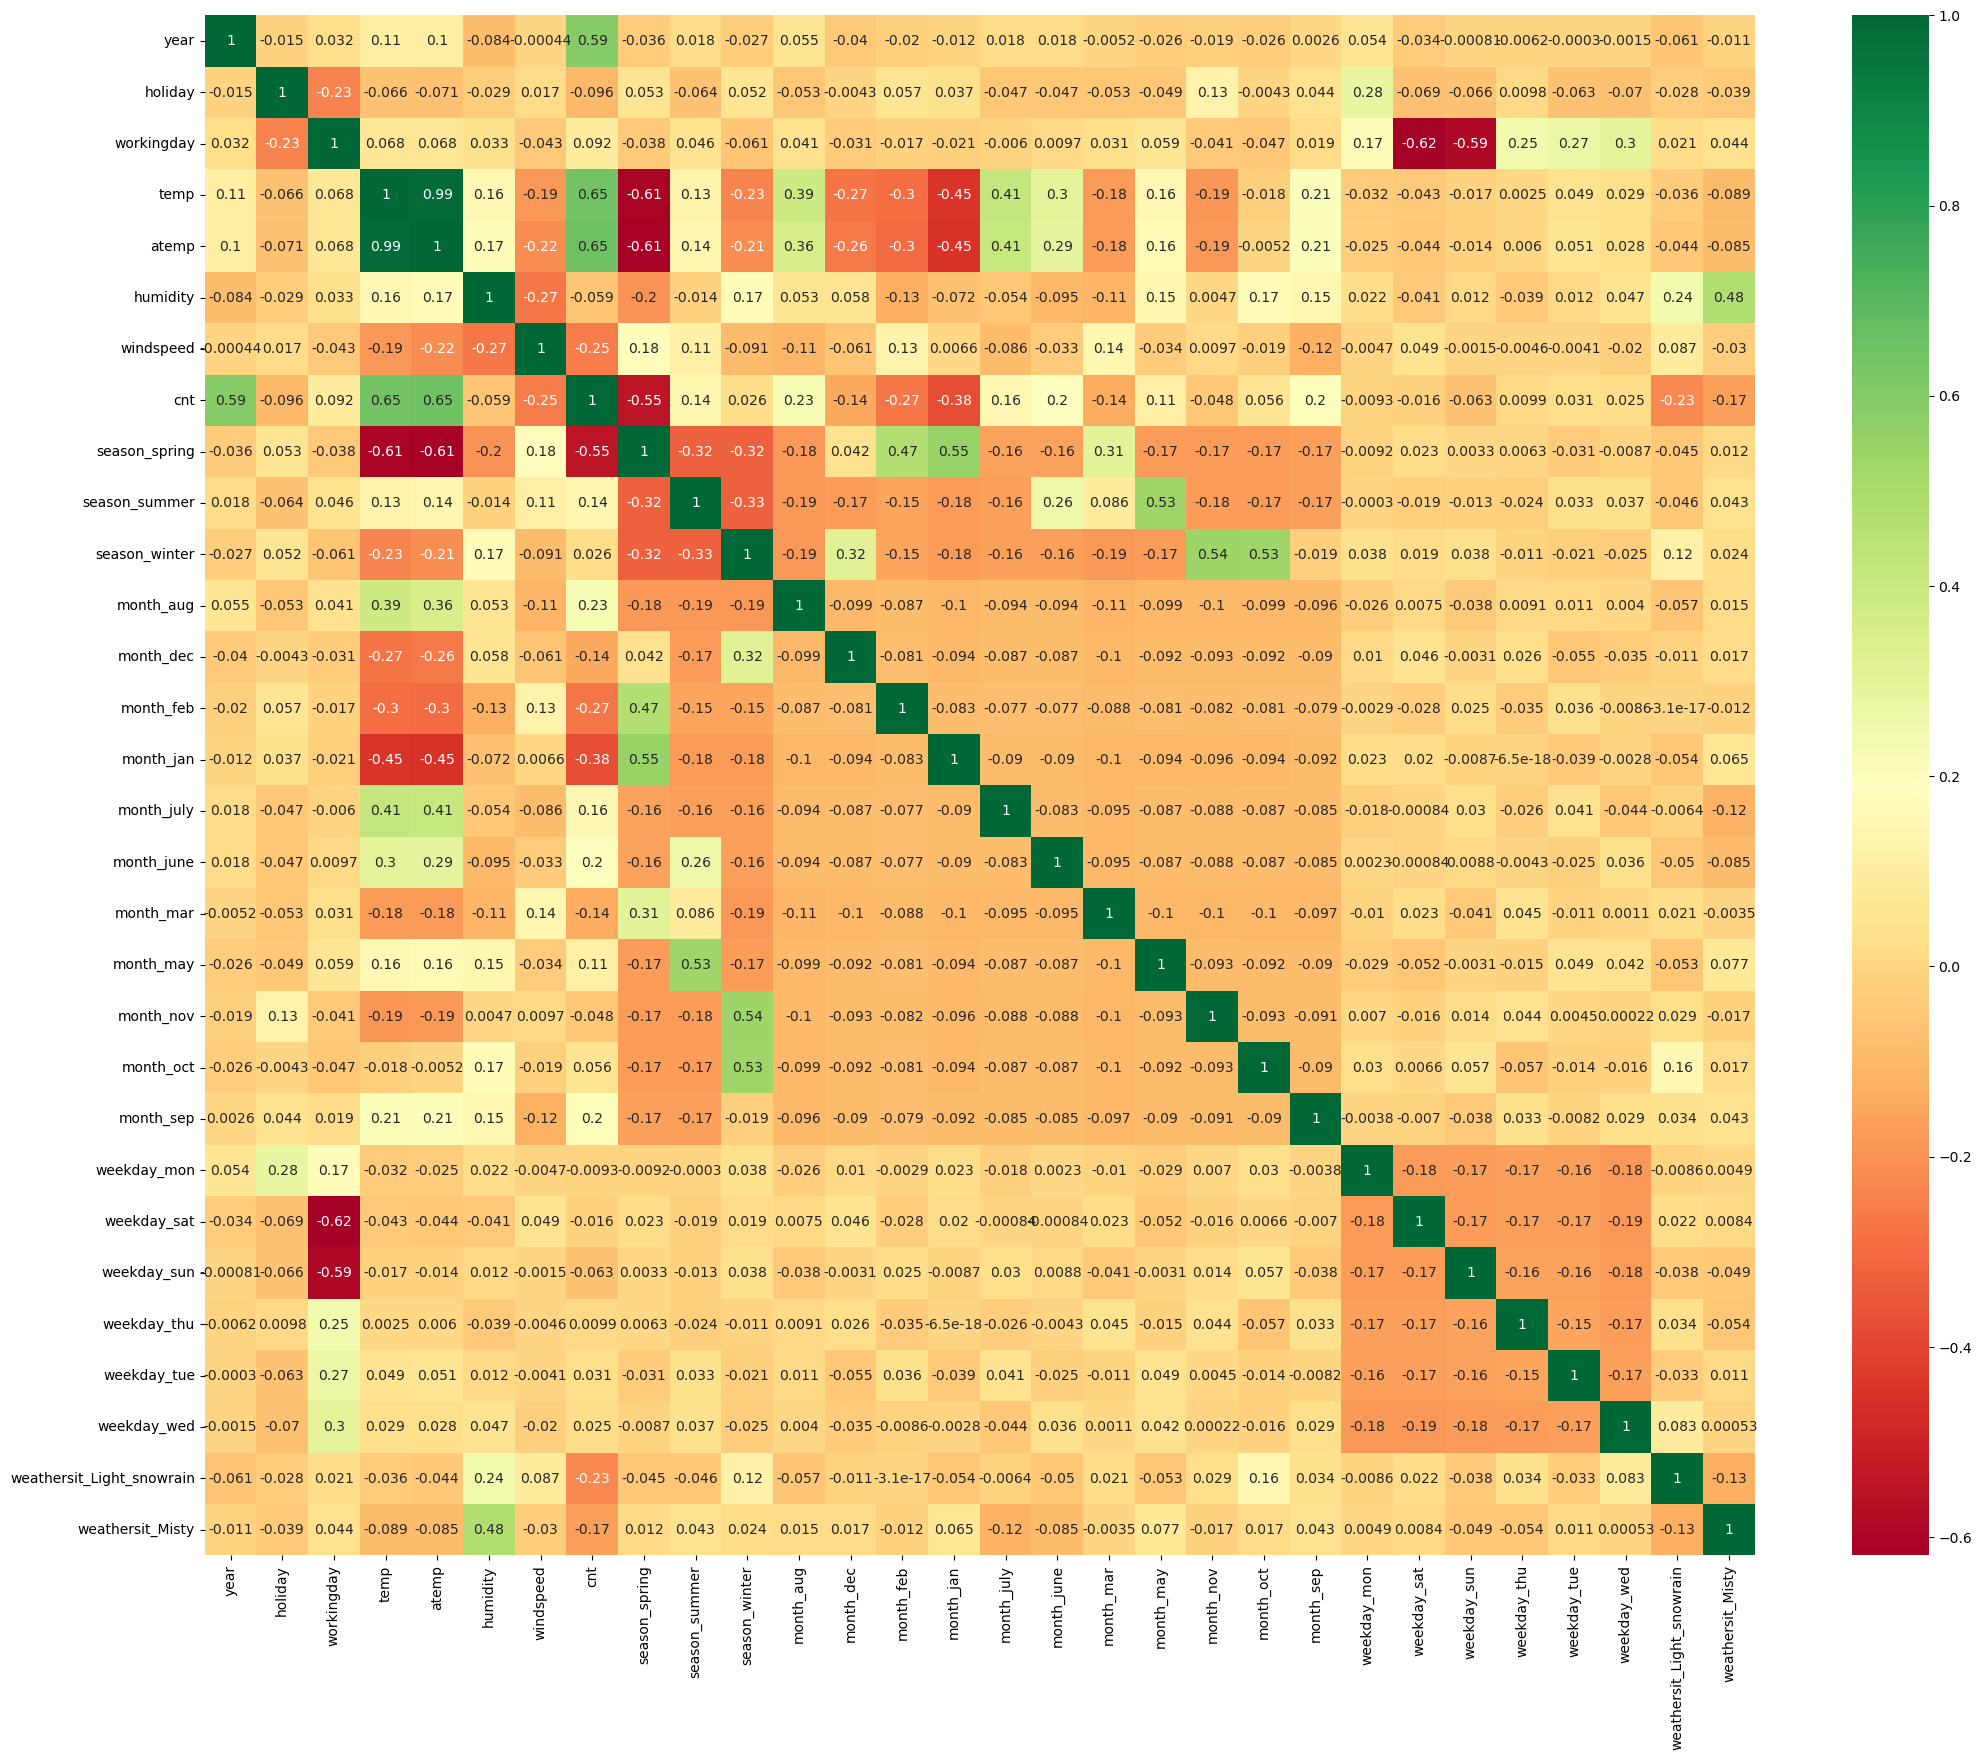

In [18]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

### RFE ( Recursive Feature elimination)

In [19]:
#Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
#X_train, y_train
y_train = df_train.pop("cnt")
X_train = df_train


In [21]:
print(y_train.head())
print(X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

     season_spring  season_summer  season_winter  ...  month_oct  month_sep  \
576              0              0              0  ...          0          0   
426              1              0              0  ...          0          0   
728              1              0              0  ...          0          0   
482              0              1              0  ...          0          0   
111              0              1              0

In [22]:
#running RFE with the output number of the variable equals to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)


In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 13),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Building Model using statsmodel, for detailed statistics

In [26]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF function 

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Misty,2.29
0,year,2.09
12,weekday_sat,1.98


In [28]:
#adding a constant variables

#Model 1
import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train_rfe)

In [29]:
lm = sm.OLS(y_train,X_train_1).fit() # Running the linear model

In [30]:
#lets see the summnary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.22e-191
Time:                        22:43:44   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 2 
- humidity is insignificant in presence of other variables, its has high VIF so it can be dropped

In [31]:
X_train_new = X_train_rfe.drop(["humidity"],axis = 1)

In [32]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,year,2.08
7,season_winter,1.98
11,weekday_sat,1.97
8,month_jan,1.62
9,month_july,1.59


In [33]:
#Create another model
X_train_2 = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_2).fit() 

#lets see the summnary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.60e-188
Time:                        22:43:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 3
- holiday is insignificant in presence of other variables, its has high p-value and low VIF so it can be dropped

In [34]:
X_train_new = X_train_new.drop(["holiday"],axis = 1)

In [35]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.33
0,year,2.08
6,season_winter,1.91
10,weekday_sat,1.84
7,month_jan,1.62
8,month_july,1.59


In [36]:
#Create another model
X_train_3 = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_3).fit() 

#lets see the summnary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          8.68e-189
Time:                        22:43:45   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 4
- month_jan is insignificant in presence of other variables, its has high p-value so it can be dropped

In [37]:
X_train_new = X_train_new.drop(["month_jan"],axis = 1)

In [38]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.32
0,year,2.07
6,season_winter,1.91
9,weekday_sat,1.83
7,month_july,1.58
11,weathersit_Misty,1.57


In [39]:
#Create another model
X_train_4 = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_4).fit() 

#lets see the summnary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          7.12e-189
Time:                        22:43:45   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 5
- Month_july is insignificant in presence of other variables, its has high p-value so it can be dropped

In [40]:
X_train_new = X_train_new.drop(["month_july"],axis = 1)

In [41]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.30
0,year,2.07
5,season_summer,2.00
8,weekday_sat,1.83
6,season_winter,1.76
10,weathersit_Misty,1.57
7,month_sep,1.23


In [42]:
#Create another model
X_train_5 = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_5).fit() 

#lets see the summnary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.42e-188
Time:                        22:43:45   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 6
- spring is insignificant in presence of other variables, its has high p-value and low VIF, so it can be dropped

In [43]:
X_train_new = X_train_new.drop(["season_spring"],axis = 1)

In [44]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_Misty,1.53
5,season_winter,1.40
6,month_sep,1.20
8,weathersit_Light_snowrain,1.08


In [45]:
#Create another model
X_train_6 = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_6).fit() 

#lets see the summnary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.13e-188
Time:                        22:43:45   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### We can cosider the above model, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 253 (which is greater than 1) and the p-value of 3.13e-188 i.e almost equals to zero, states that the overall model is significant

In [46]:
# Checking the parameters and their coefficient values
lm.params


const                        0.075009
year                         0.233139
workingday                   0.056117
temp                         0.549892
windspeed                   -0.155203
season_summer                0.088621
season_winter                0.130655
month_sep                    0.097365
weekday_sat                  0.067500
weathersit_Light_snowrain   -0.287090
weathersit_Misty            -0.080022
dtype: float64

## Step-4: Residual Analysis

In [47]:
X_train_6

,const,year,workingday,temp,windspeed,season_summer,season_winter,month_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,0,1
111,1.0,0,1,0.345824,0.380981,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,1,0,0,0,0,1


In [48]:
y_train_pred = lm.predict(X_train_6)

<Axes: ylabel='Density'>

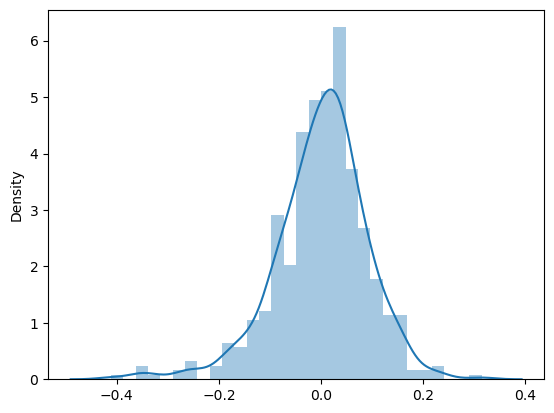

In [49]:
res = y_train - y_train_pred
sns.distplot(res)

### Observation:
- from the above histogram plot, the error term is normally distributed. so our linear regression assumpution is valid

#### Multi Colinearity

In [50]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_Misty,1.53
5,season_winter,1.40
6,month_sep,1.20
8,weathersit_Light_snowrain,1.08


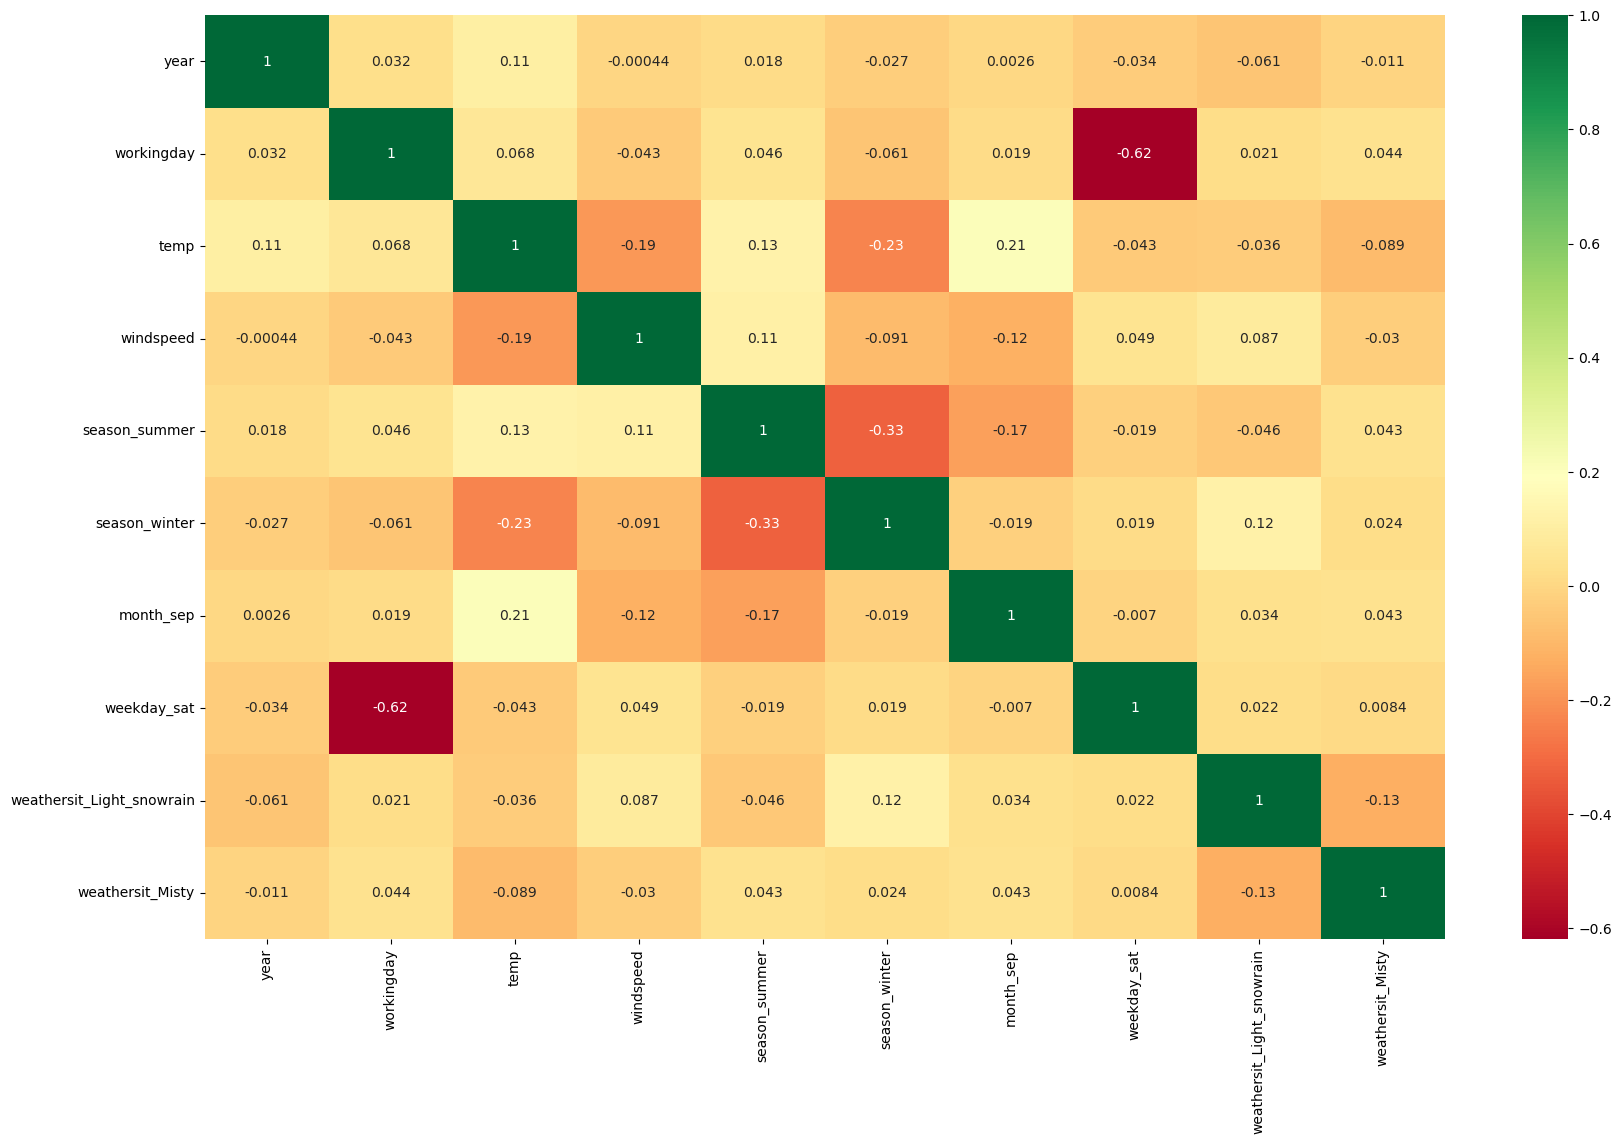

In [51]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Observation: 

The VIF is less than 5 and there is no multi colenearity as seen from the above heatmap which is good for the model.



#### Linearity

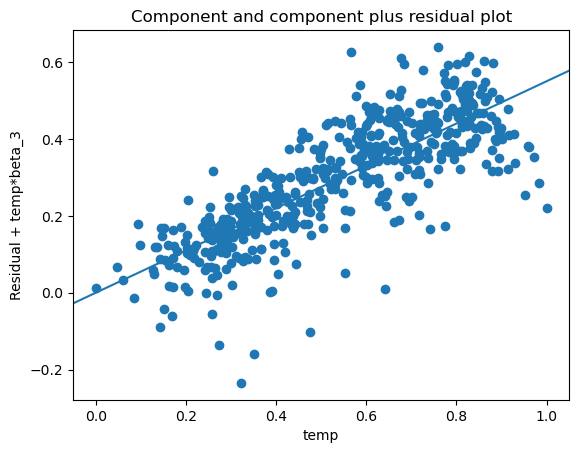

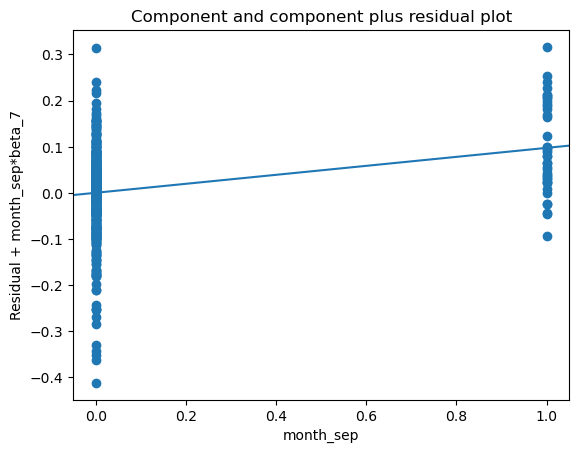

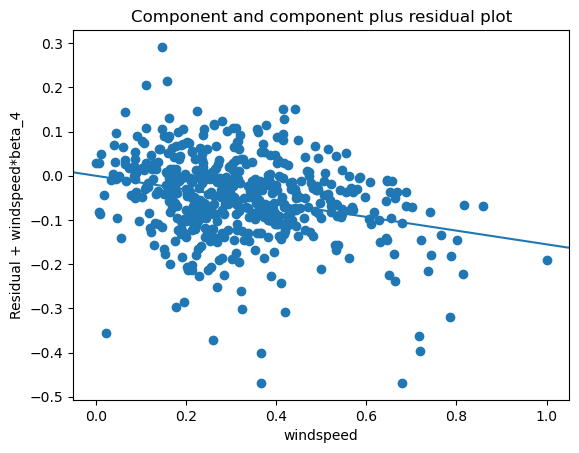

In [52]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm, 'month_sep')
plt.show()

sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

#### Obervations:

- Linearity can be observed from the above plots

### Homoscedasticity

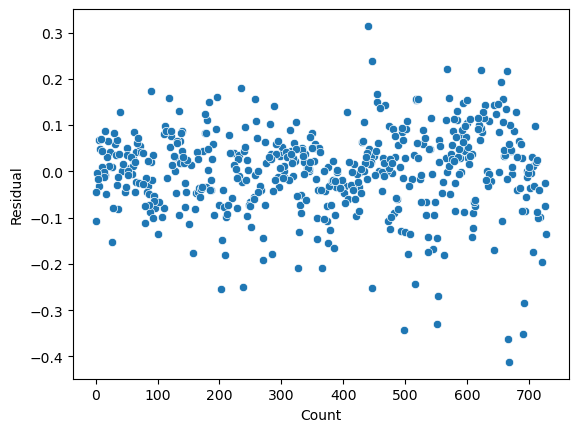

In [53]:
y_train_pred = lm.predict(X_train_6)
residual = y_train - y_train_pred
sns.scatterplot(residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 5 : Predictions and Evaluation on the Test Set

In [54]:
#create a list of numberic vars
num_vars = ["temp","atemp","humidity","windspeed","cnt"]

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [55]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
#dropping the columns which we drop while creating the models
col1 = X_train_new.columns
X_test = X_test[col1]

#add a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,workingday,temp,windspeed,season_summer,season_winter,month_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0


In [58]:
#predict
y_test_pred = lm.predict(X_test_sm)

In [59]:
from sklearn.metrics import r2_score

#evaluate to compute the r2 score
r2= r2_score(y_true=y_test,y_pred=y_test_pred)
round(r2,4)

0.7961

### Model Evaluation

Text(0, 0.5, 'y_pred')

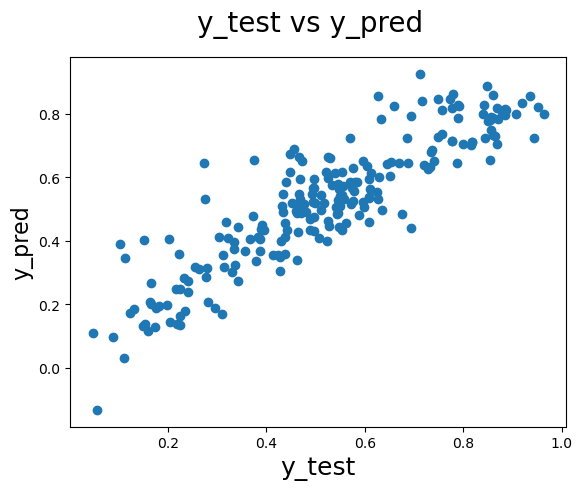

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 


In [61]:
round(lm.params,4)

const                        0.0750
year                         0.2331
workingday                   0.0561
temp                         0.5499
windspeed                   -0.1552
season_summer                0.0886
season_winter                0.1307
month_sep                    0.0974
weekday_sat                  0.0675
weathersit_Light_snowrain   -0.2871
weathersit_Misty            -0.0800
dtype: float64

Using the above Coefficients, out equations for best fitted line is :

cnt = 0.0750 + 0.2331*year + 0.0561*workingday + 0.5499*temp - 0.1552*windspeed + 0.0886*summer + 0.1307*winter + 0.0974*sep +0.0675*sat - 0.2871*Light_snowrain - 0.08*Misty


#### Demand of bikes depend on year, workingday, temp, windspeed, summer, winter, sep, sat, Light_snowrain, Misty.

In [62]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


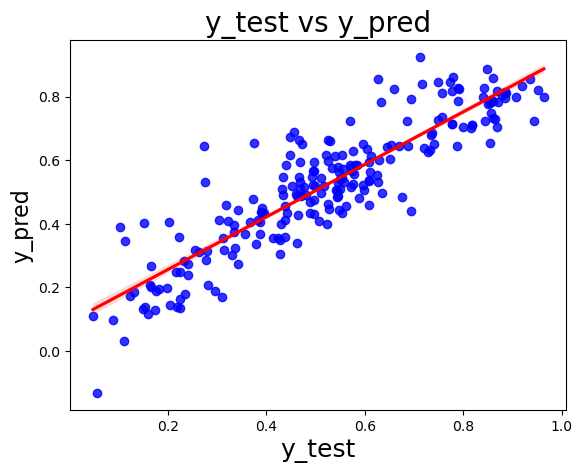

In [63]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.835
- Test dataset R^2           : 0.7961
- Train dataset Adjusted R^2 : 0.832    
- Test dataset Adjusted R^2  : 0.7864